In [1]:
from game import Game
from minmax import Algorithms
from player import Player, MAX_NUM_OF_PIECES

pygame 2.6.1 (SDL 2.28.4, Python 3.13.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Heuristic comparison
For this experiment I use two different heuristics. The first is the simplest one and is the Material Advantage evaluation. The second is the Simplified Evaluation Function (SEF)
 [explained here](https://www.chessprogramming.org/Simplified_Evaluation_Function), that is a more complex function that takes in account also other parameters such as the game phase (startgame, midgame, endgame) and values like king's safety, opponent threats, center control, mobility and pawn structure. 

 For this test, the opponent will be a player with Branching Limited MinMax (L = 2, BF = 4) that uses the simple heuristic. Then I will evaluate the win rate on 100 games of two players that uses the same algorithm and the two heuristics.

In [2]:
engine_params={"L":2, "BF": 4}
NRUNS = 10

opponent = Player(color="white", algorithm=Algorithms.BRANCHING_LIMIT, engine_params=engine_params, strong_level=0, statistics_mode=False)

### SEF

In [3]:
game = Game(in_jupiter=True)

player_SEF = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params=engine_params, strong_level=1, statistics_mode=True)

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_SEF},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


### Material advantage

In [4]:
game = Game(in_jupiter=True)

player_MA = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params=engine_params, strong_level=0, statistics_mode=True)

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_MA},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


### Results
Not as expected, the most efficient heuristic is the simplest one. This could be, according to researches and chatGPT, because "Against weaker opponents, simpler heuristics like Material Advantage perform better because they focus on maximizing tangible gains. A complex SEF might prioritize long-term positional gains or avoidable penalties, which are less effective against simpler strategies".

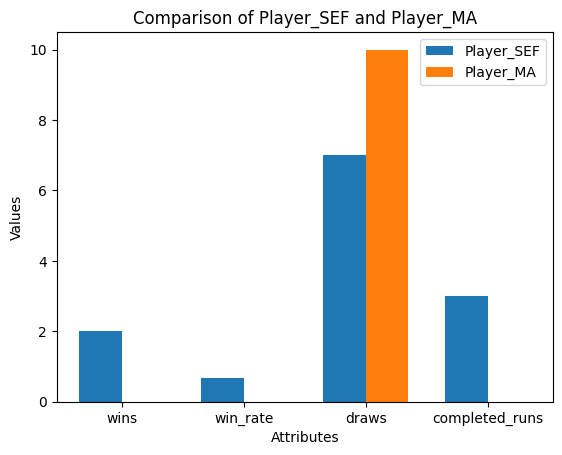

In [5]:
import matplotlib.pyplot as plt

# Assuming player_SEF and player_MA are already defined
attributes = ['wins', 'win_rate', 'draws', 'completed_runs']
player_SEF_values = [player_SEF.wins, player_SEF.win_rate, player_SEF.draws, player_SEF.completed_runs]
player_MA_values = [player_MA.wins, player_MA.win_rate, player_MA.draws, player_MA.completed_runs]

x = range(len(attributes))

fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(x, player_SEF_values, bar_width, label='Player_SEF')
bar2 = ax.bar([p + bar_width for p in x], player_MA_values, bar_width, label='Player_MA')

ax.set_xlabel('Attributes')
ax.set_ylabel('Values')
ax.set_title('Comparison of Player_SEF and Player_MA')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(attributes)
ax.legend()

plt.show()

# Algorithms comparison
In this section, the goal is to compare different applications of the MinMax algorithm. In order, I will evaluate:
- MinMax
- MinMax with Alpha-Beta Pruning
- Branching Limited MinMax with Alpha-Beta Pruning 

Also for this test, I will use as opponent the white player with Material Advantage heuristic, L = 2 and BF = 4, while the player will use the SEF heuristic.

In [6]:
players_list = []


In [7]:
game = Game(in_jupiter=True)

player_MinMax = Player(color="black", algorithm=Algorithms.MIN_MAX, engine_params={"L":2}, strong_level=1, statistics_mode=True)
players_list.append((player_MinMax, "MinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_MinMax},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 10/10 [03:17<00:00, 19.73s/it]


In [8]:
game = Game(in_jupiter=True)

player_FSABMinMax = Player(color="black", algorithm=Algorithms.FAIL_SOFT_ALPHA_BETA, engine_params={"L":2}, strong_level=1, statistics_mode=True)
players_list.append((player_FSABMinMax, "FSABMinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_FSABMinMax},
    random_configuration_steps=20,
    plot=False
)

Running games: 100%|██████████| 10/10 [00:27<00:00,  2.70s/it]


In [ ]:
game = Game(in_jupiter=True)

player_FHABMinMax = Player(color="black", algorithm=Algorithms.FAIL_SOFT_ALPHA_BETA, engine_params={"L":2}, strong_level=1, statistics_mode=True)
players_list.append((player_FHABMinMax, "FHABMinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_FHABMinMax},
    random_configuration_steps=20,
    plot=False
)

In [4]:
game = Game(in_jupiter=True)

player_BLMinMax = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={"L":2, "BF": 4}, strong_level=1, statistics_mode=True)
players_list.append((player_BLMinMax, "BLMinMax"))

game.start_in_statistics_mode(
    nruns=NRUNS,
    ai_players={"white": opponent, "black": player_BLMinMax},
    random_configuration_steps=20,
    plot=False
)

Running games:   0%|          | 0/10 [00:07<?, ?it/s]


RecursionError: maximum recursion depth exceeded

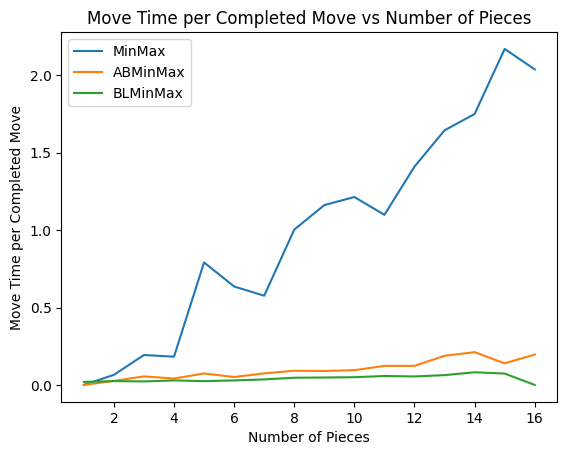

In [10]:
# Plot the values
fig, ax = plt.subplots()

x = range(1, MAX_NUM_OF_PIECES + 1)

for player, name in players_list:
    ax.plot(x, [player.move_times_per_npieces[i] / player.completed_moves_per_npieces[i] if player.completed_moves_per_npieces[i] != 0 else 0
                    for i in range(1, MAX_NUM_OF_PIECES + 1)], label=name)

ax.set_xlabel('Number of Pieces')
ax.set_ylabel('Move Time per Completed Move')
ax.set_title('Move Time per Completed Move vs Number of Pieces')
ax.legend()

plt.show()

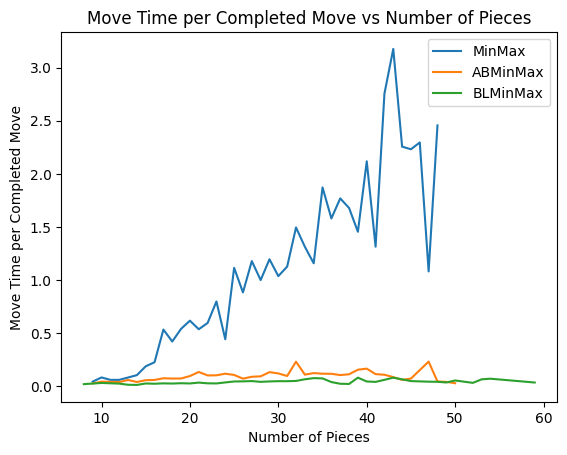

In [11]:
# Plot the values
fig, ax = plt.subplots()

for player, name in players_list:
    # Usa le chiavi ordinate per `x` e calcola `y` corrispondente
    x = sorted(player.move_times_per_nmoves.keys())
    y = [
        player.move_times_per_nmoves[i] / player.completed_moves_per_nmoves[i]
        if player.completed_moves_per_nmoves[i] != 0 else 0
        for i in x
    ]
    ax.plot(x, y, label=name)

ax.set_xlabel('Number of Pieces')
ax.set_ylabel('Move Time per Completed Move')
ax.set_title('Move Time per Completed Move vs Number of Pieces')
ax.legend()

plt.show()

## 2. blMinMaxl

In [3]:
L = 5

players_list = []
for l in range(L+1):
    game = Game(in_jupiter=True)
    player_BLMinMaxl = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={
                             "L": L, "BF": 1, "l": l}, strong_level=1, statistics_mode=True)
    players_list.append((player_BLMinMaxl, f"BLMinMax_l{l}"))

    game.start_in_statistics_mode(
        nruns=NRUNS,
        ai_players={"white": opponent, "black": player_BLMinMaxl},
        random_configuration_steps=20,
        plot=False
    )

Running games:   0%|          | 0/10 [00:00<?, ?it/s]